In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

DATA ANALYSIS

In [31]:
data = pd.read_csv('winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
data.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [33]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
classes = data['quality'].value_counts()
classes

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

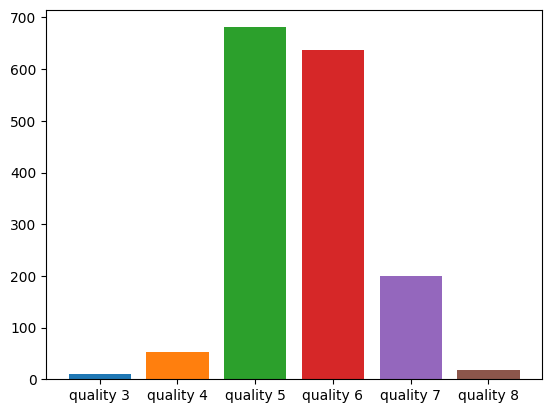

In [35]:
plt.bar('quality 3' , classes[3])
plt.bar('quality 4' , classes[4])   
plt.bar('quality 5' , classes[5]) 
plt.bar('quality 6' , classes[6])   
plt.bar('quality 7' , classes[7])   
plt.bar('quality 8' , classes[8])        
plt.show()

In [36]:
data.duplicated().sum()

240

In [37]:
len (data)

1599

In [38]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [39]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [40]:
len(data)

1359

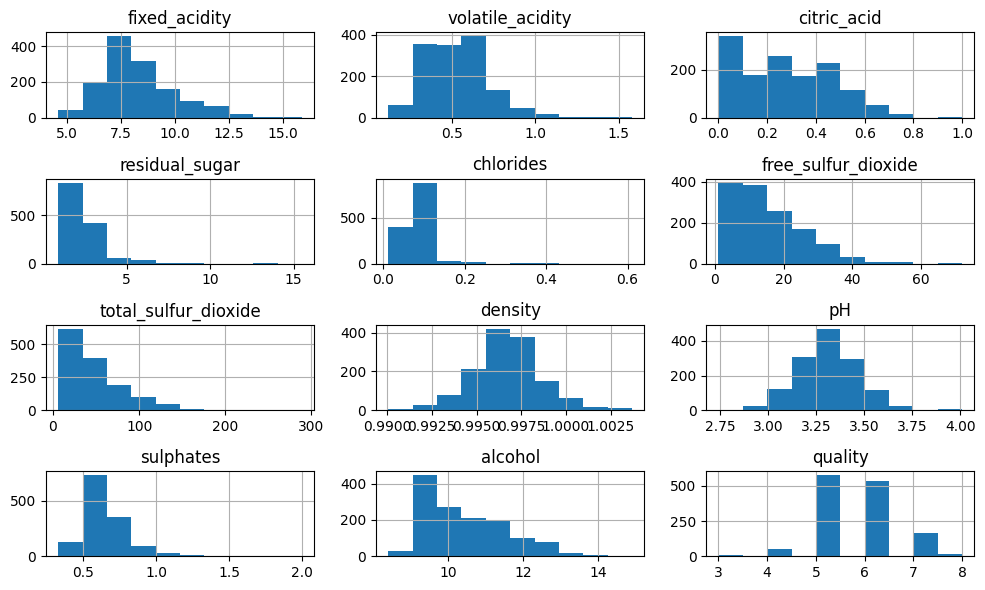

In [41]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

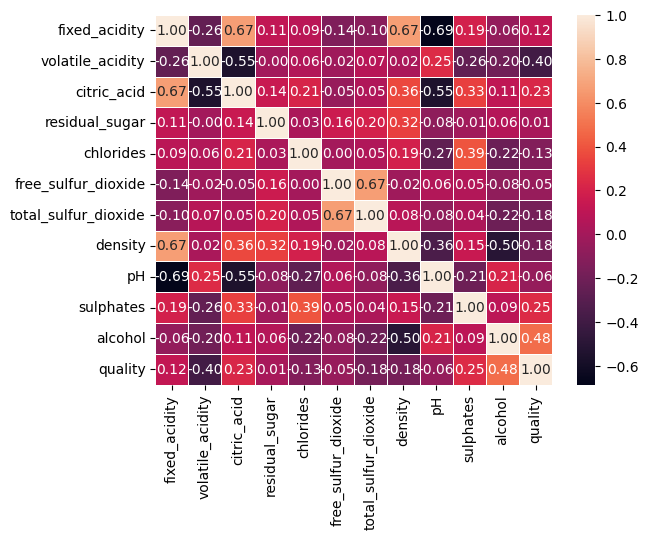

In [42]:
corr_matrix = data.corr()
ax= sn.heatmap(corr_matrix, annot=True, linewidths=.5 , fmt= ".2f")
ax.set(xlabel='',ylabel='')
plt.show()

In [49]:
y = data["quality"]
x = data.drop("quality", axis = 1)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [57]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  13,   5,   0,   0],
       [  0,   0, 136,  38,   0,   0],
       [  0,   0,  65,  91,   5,   0],
       [  0,   0,   4,  46,   1,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.62      0.78      0.69       174
           6       0.50      0.57      0.53       161
           7       0.17      0.02      0.04        51
           8       0.00      0.00      0.00         2

    accuracy                           0.56       408
   macro avg       0.21      0.23      0.21       408
weighted avg       0.48      0.56      0.51       408



c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,